Controle Moderno do Guindaste

In [49]:
import numpy as np
import sympy as sp
import control as co_general
import control.matlab as co
import matplotlib.pyplot as plt
from scipy.linalg import expm

- Espaço de Estados

In [20]:
A = np.array([[0, 0, 0, 1.00000000000000, 0, 0], [0, 0, 0, 0, 1.00000000000000, 0], [0, 0, 0, 0, 0, 1.00000000000000], [-0.272532484734331, 20.7794775641437, -2.92560309607353, -208.798301585251, 298.079468204669, -142.353461848981], [2.33949717294628, -31.6368341557284, 5.83928276377584, 298.079468204669, -465.563303867486, 243.249593421963], [-3.29961261263182, 13.2206364787286, -4.36117144273847, -142.353461848981, 243.249593421963, -192.380720060247]])
B = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0], [-6.19949546185575e-5, 5.21169939154305e-5, 0.000208798301585251], [0.000116297234729458, -7.44019741194813e-5, -0.000298079468204669], [-7.00601407317925e-5, 8.98378658944935e-5, 0.000142353461848981]])
C = np.eye(6)
D = np.zeros((6, 3))

- FTs do espaço de estados(Corrigir)

In [43]:
sl_OpenLoop = co.ss(A, B, C, D)
print(sl_OpenLoop)

# TODO: Calcular funções de transferência
# h = co.ss2tf(sl_OpenLoop)
# print(h)

<LinearIOSystem>: sys[32]
Inputs (3): ['u[0]', 'u[1]', 'u[2]']
Outputs (6): ['y[0]', 'y[1]', 'y[2]', 'y[3]', 'y[4]', 'y[5]']
States (6): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]']

A = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
       0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
       1.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
       0.00000000e+00  1.00000000e+00]
     [-2.72532485e-01  2.07794776e+01 -2.92560310e+00 -2.08798302e+02
       2.98079468e+02 -1.42353462e+02]
     [ 2.33949717e+00 -3.16368342e+01  5.83928276e+00  2.98079468e+02
      -4.65563304e+02  2.43249593e+02]
     [-3.29961261e+00  1.32206365e+01 -4.36117144e+00 -1.42353462e+02
       2.43249593e+02 -1.92380720e+02]]

B = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.000000

- Polos espaço de estados em malha aberta

[-7.93515881e+02+0.j -6.40798188e+01+0.j -9.08408367e+00+0.j
 -8.51357708e-02+0.j  3.08372123e-02+0.j -8.24355082e-03+0.j]
O sistema é instável pelo critério de Routh-Hurwitz.


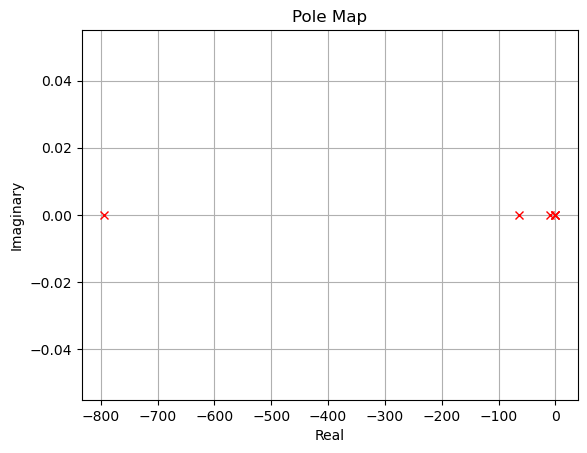

In [44]:
# Calcule os polos e zeros do sistema
polos = co.pole(sl_OpenLoop)
# Imprima os polos e zeros
print(polos)

#Estabilidade
condicoes_estabilidade = np.all(np.real(polos) < 0)

if condicoes_estabilidade:
    print("O sistema é estável pelo critério de Routh-Hurwitz.")
else:
    print("O sistema é instável pelo critério de Routh-Hurwitz.")

# Plote apenas os polos
plt.plot(np.real(polos), np.imag(polos), 'rx')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole Map')
plt.grid(True)
plt.show()

- Matriz de transição do sistema

In [50]:
# Calcula a matriz de transição Phi
dt = 0.1
Phi = expm(A * dt)

# Calcula a matriz dos termos forçantes Gamma
Gamma = np.linalg.inv(A) * (Phi - np.eye(A.shape[0]))

# Imprime Phi e Gamma
print(Phi)
print(Gamma)

[[ 1.00245482e+00  2.60946283e-03  1.37848187e-03  4.06727502e-02
   2.86712499e-02  5.79770739e-03]
 [ 7.84143550e-04  9.93404436e-01  1.24717714e-03  2.85084603e-02
   2.61898090e-02  1.17291668e-02]
 [-2.40301126e-03 -3.18557187e-03  9.98380877e-01  5.66235294e-03
   1.16719398e-02  1.56434197e-02]
 [ 3.68614741e-02  1.47403028e-02  2.31424157e-02  2.31040869e-01
   1.88329332e-01  7.03744552e-02]
 [ 1.47997958e-02 -8.11046817e-02  1.83723531e-02  1.85222887e-01
   1.51292180e-01  5.71639925e-02]
 [-2.58539299e-02 -4.47865233e-02 -1.66336756e-02  6.75779761e-02
   5.58741997e-02  2.20276008e-02]]
[[ 0.31997428 -0.2435488   0.21411871  0.24726707  0.14897964  0.01669145]
 [-0.00919655 -0.02561307 -0.0301763  -0.02584963 -0.02217631 -0.00616338]
 [ 0.40085162 -0.44012839  0.38046214 -0.04160891 -0.07584682 -0.06258056]
 [ 0.03686147  0.          0.         -0.          0.          0.        ]
 [ 0.         -0.08110468  0.          0.         -0.          0.        ]
 [-0.         -0. 

- Controlabilidade e Observabilidade do sistema(Errado)

In [71]:
# Análise de controlabilidade
C = co.ctrb(A, B)
np.linalg.matrix_rank(C)
# Análise de observabilidade
C = ct.obsv(A, C.T)
>>> np.linalg.matrix_rank(C)



[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.19949546e-05
   5.21169939e-05  2.08798302e-04  5.75835627e-02 -4.58483719e-02
  -1.52712608e-01 -4.59501232e+01  3.71337461e+01  1.20570560e+02
   3.64760600e+04 -2.95186104e+04 -9.56376012e+04 -2.89452010e+07
   2.34268815e+07  7.58875991e+07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.16297235e-04
  -7.44019741e-05 -2.98079468e-04 -8.96652487e-02  7.20268591e-02
   2.35640770e-01  7.12117406e+01 -5.76076901e+01 -1.86744705e+02
  -5.65136539e+04  4.57381962e+04  1.48167861e+05  4.48448859e+07
  -3.62955927e+07 -1.17572445e+08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.00601407e-05
   8.98378659e-05  1.42353462e-04  5.05926718e-02 -4.28003578e-02
  -1.29616932e-01 -3.97392618e+01  3.22795949e+01  1.03989238e+02
   3.15068578e+04 -2.55078460e+04 -8.25905502e+04 -2.49994624e+07
   2.02340669e+07  6.55416249e+07]
 [-6.19949546e-05  5.21169939e-05  2.08798302e-04  5.75835627e-02
  -4.58483719e-02 -1.52712608e-01 -4.

3